## Perform planning on raw input images with Neural A*

Neural A* can also be trained to perform plannig on a raw image input. Here we present some examples with Mario dataset.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from neural_astar.planner import NeuralAstar
from neural_astar.utils.data import create_mario_dataloader
from neural_astar.utils.training import load_from_ptl_checkpoint

C:\Users\USER\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Just like the cases with shortest-path search problems, we prepare a dataset consisting of `map_designs`, `start_maps`, `goal_maps`, and `opt_trajs`. But this time `map_designs` are colored images instead of binary obstacle maps.

torch.Size([100, 3, 224, 224])


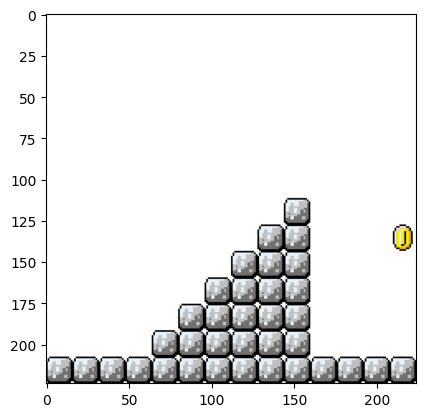

In [2]:
dataloader = create_mario_dataloader("paths", "val", 100)
map_designs, start_maps, goal_maps, opt_trajs = next(iter(dataloader))
print(map_designs.shape)
plt.imshow(map_designs[0].permute(1, 2, 0))

For training with such real images, Neural A* is configured to have (1) `rgb+` inputs consisting of RGB images and binary start+goal maps and (2) `learn_obstacles=True` indicating that the visual representation of obstacles is learned during training. Other args `encoder_arch`, `encoder_depth`, and `const` are also set properly for handling warcraft data.

In [3]:
model = NeuralAstar(encoder_input="rgb+", encoder_arch="CNNDownSize", encoder_depth=4, learn_obstacles=True, Tmax=1.0, const=10.)
model.load_state_dict(load_from_ptl_checkpoint("logdir/mario_training"))

load logdir/mario_training\version_2\checkpoints\epoch=81-step=4182.ckpt


<All keys matched successfully>

Then, Neural A* can be used in the same manner as for shortest path search.

C:\Users\USER\anaconda3\envs\myenv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\USER\AppData\Local\Temp\ipykernel_14312\1327610058.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=[6, 2])


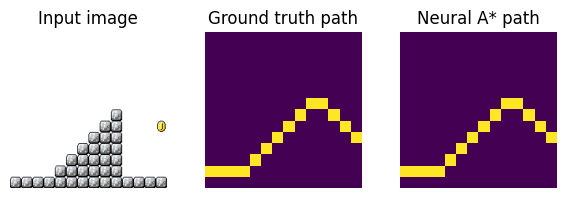

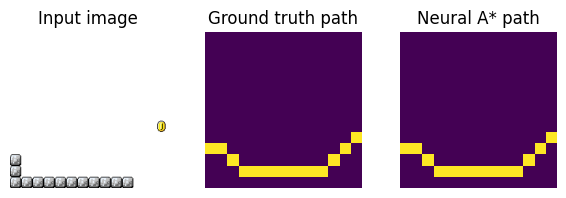

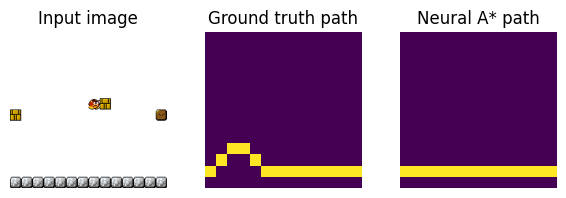

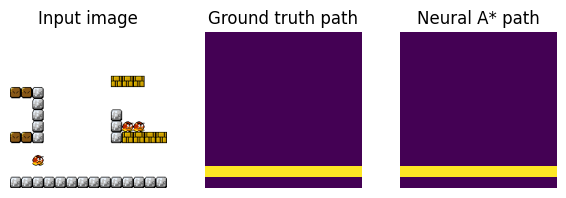

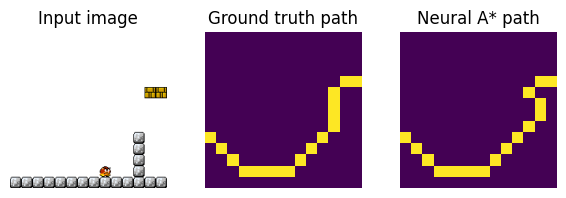

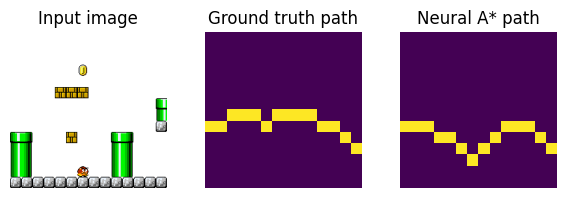

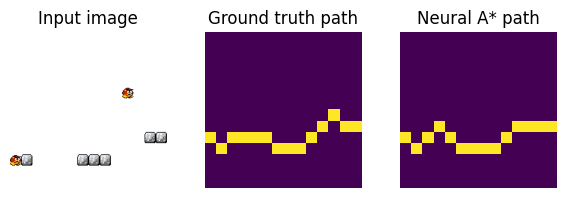

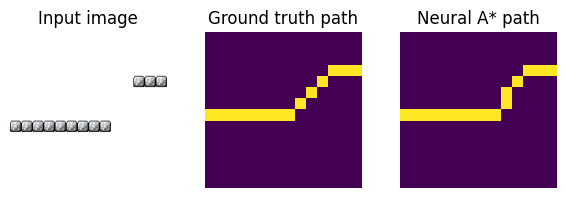

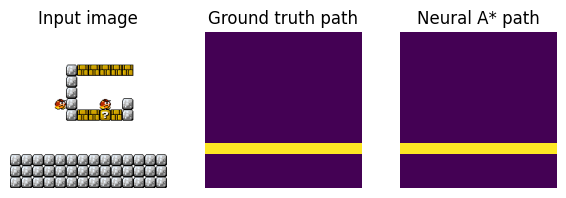

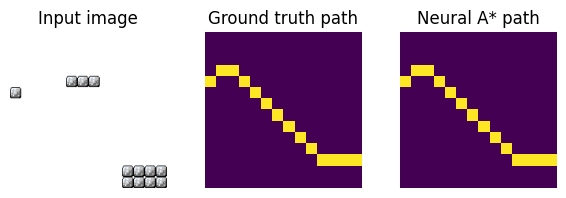

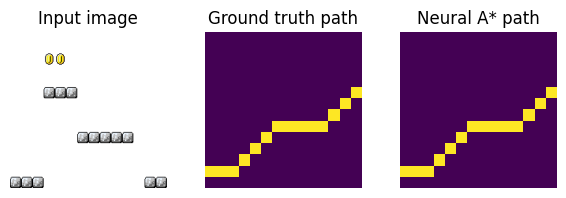

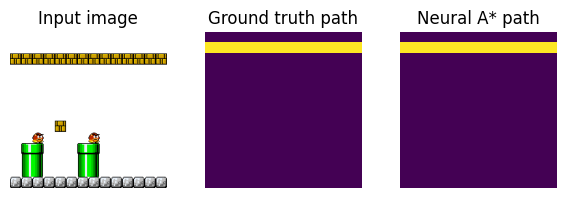

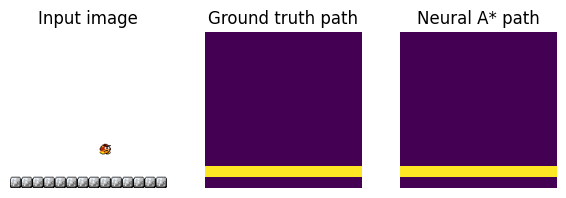

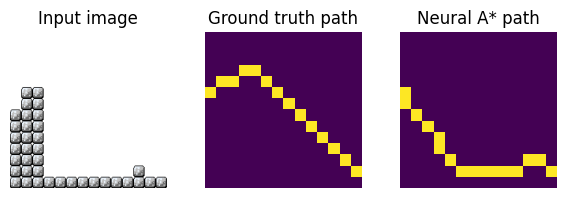

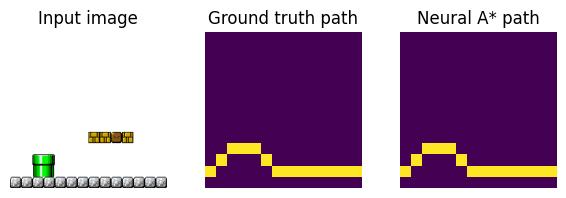

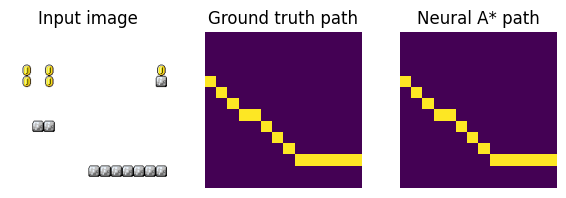

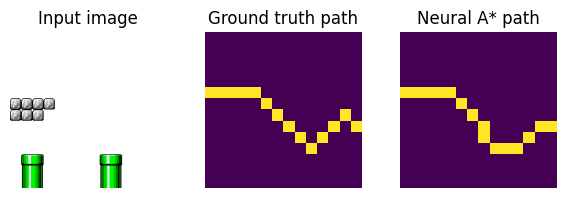

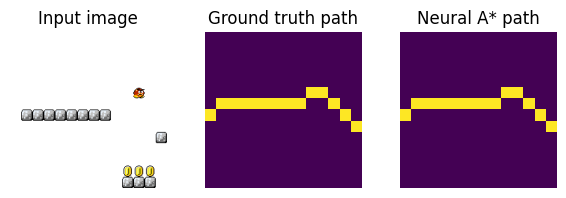

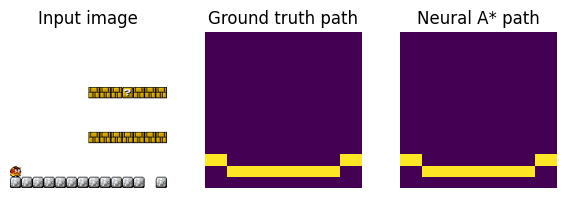

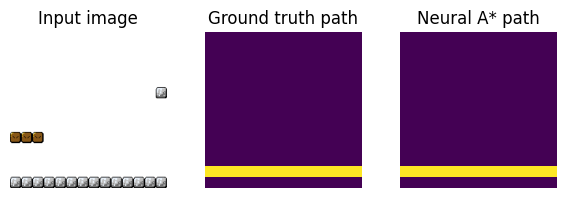

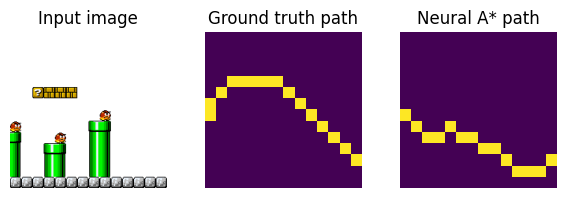

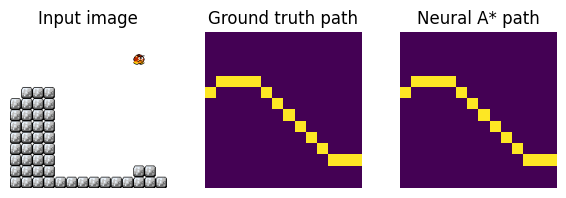

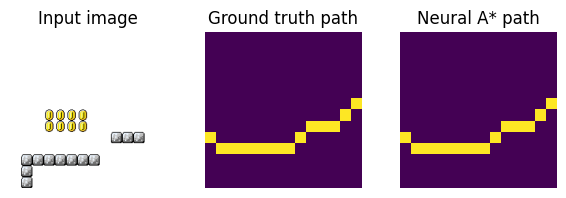

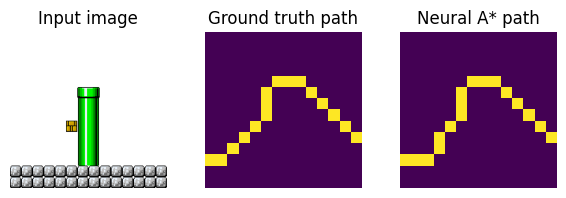

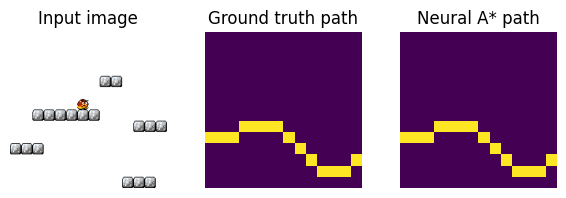

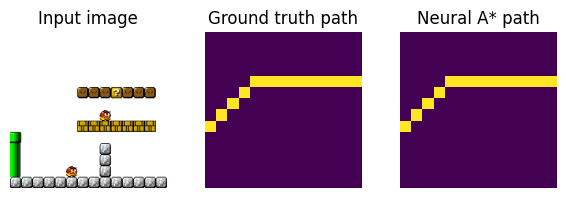

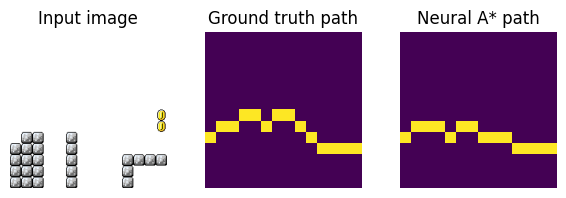

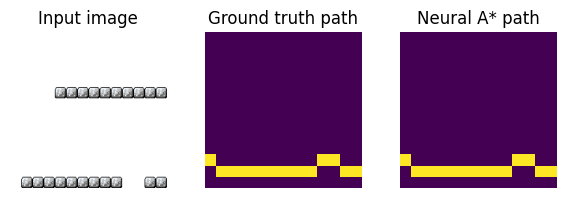

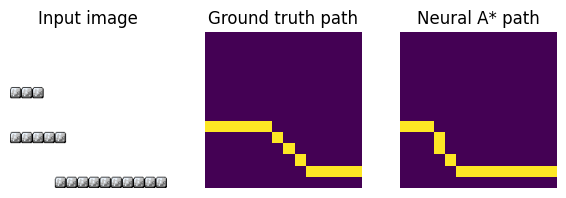

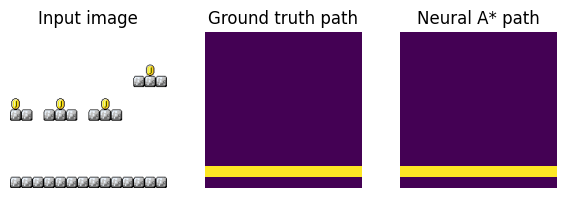

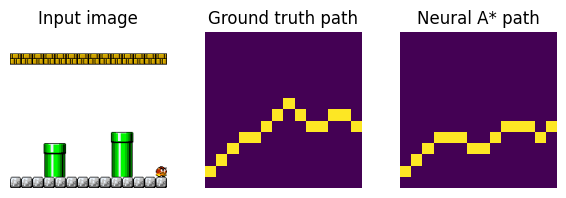

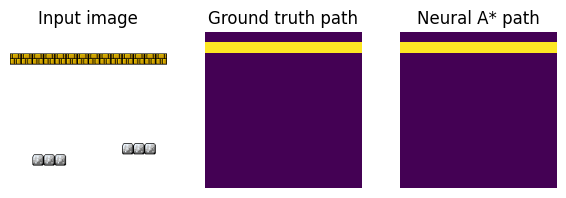

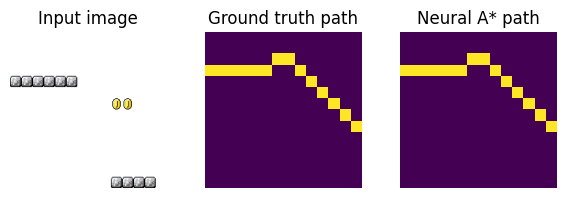

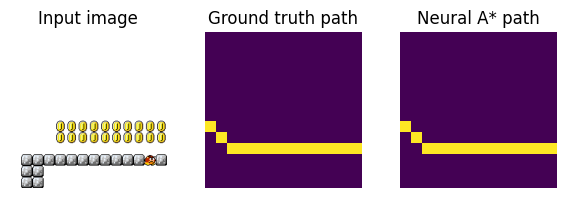

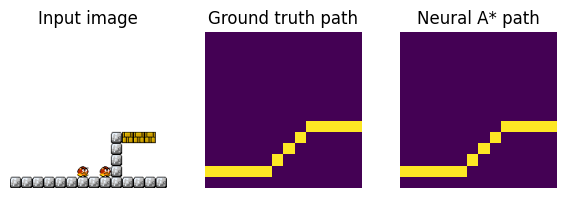

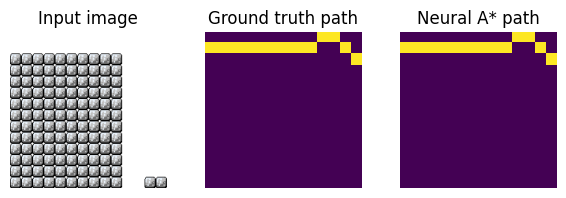

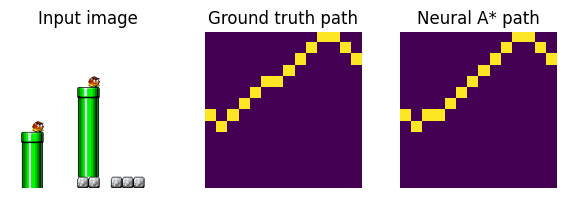

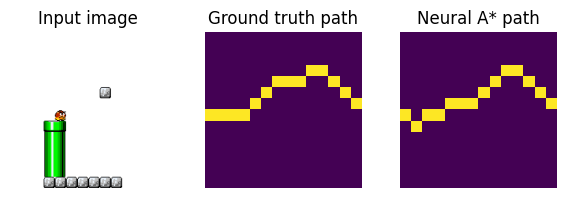

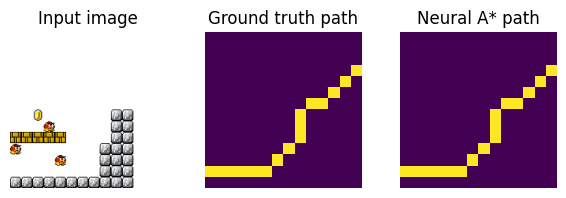

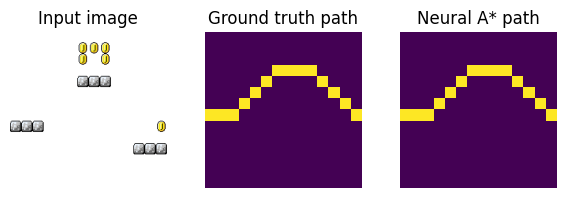

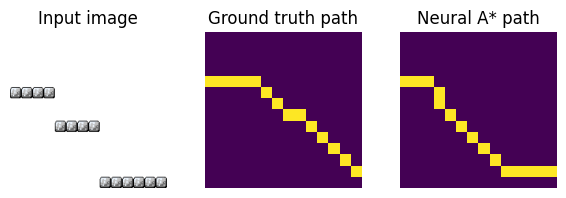

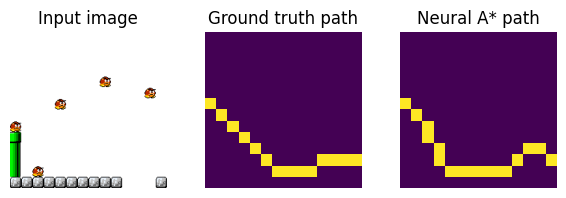

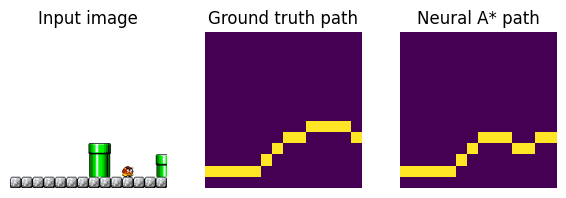

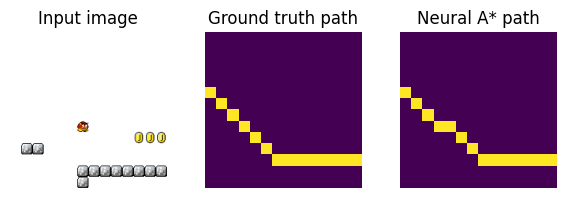

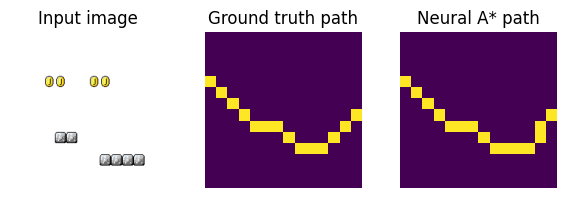

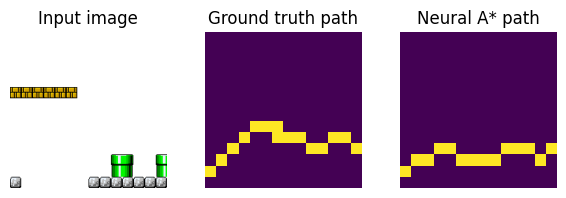

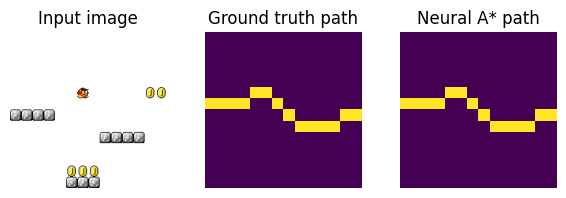

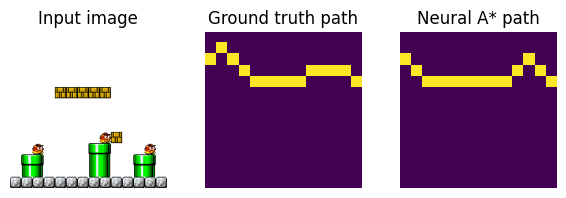

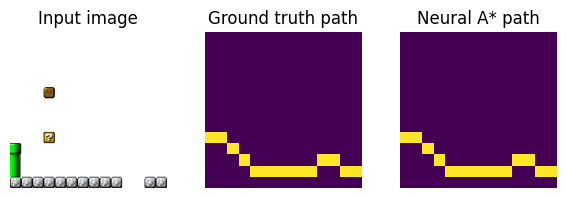

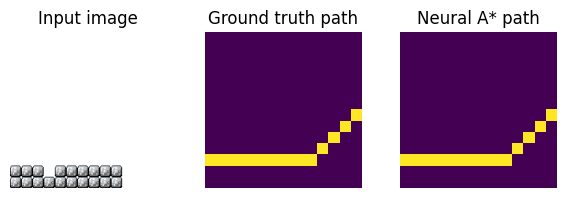

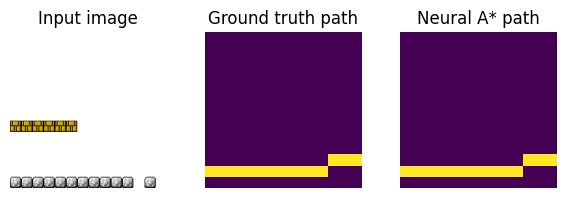

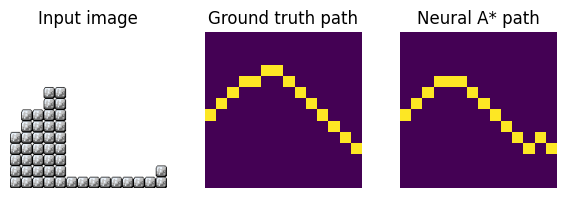

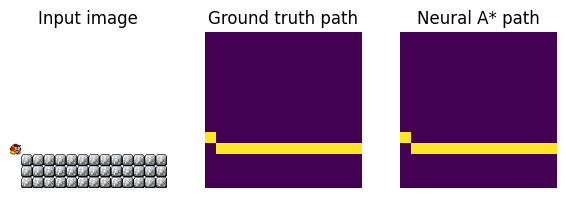

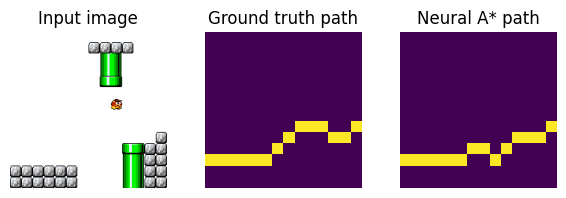

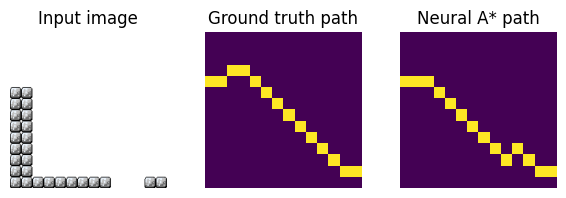

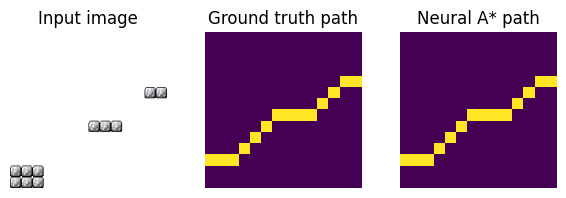

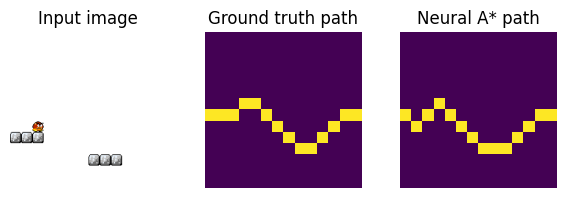

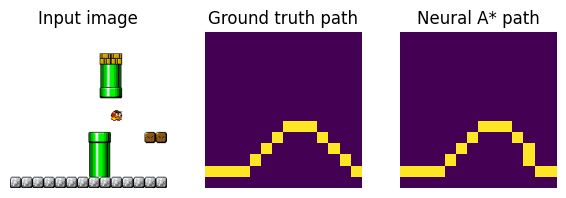

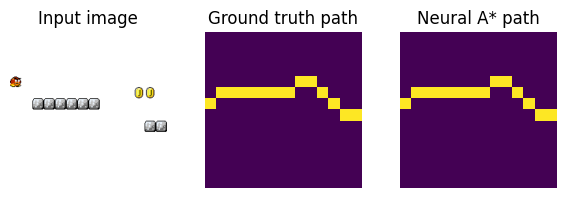

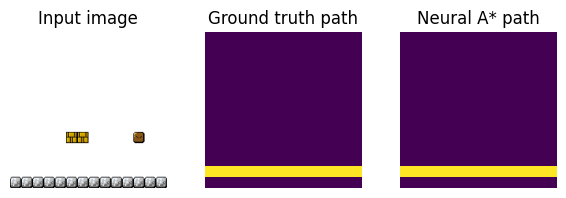

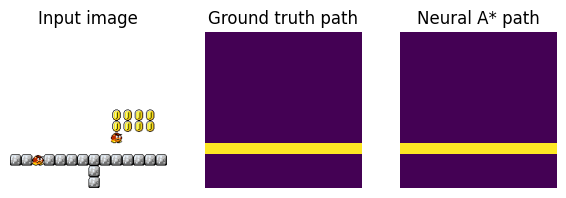

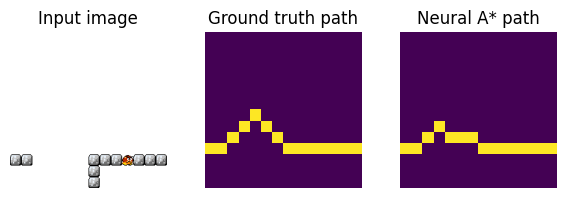

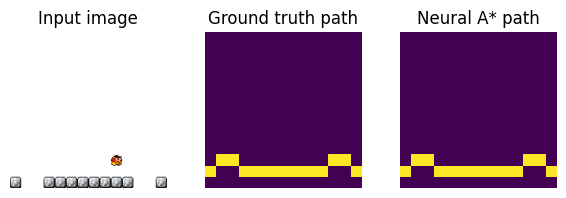

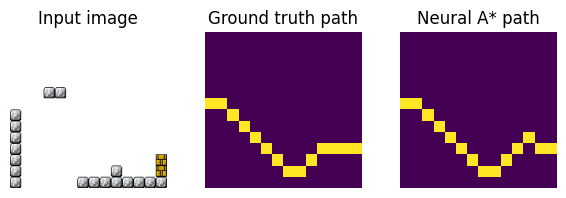

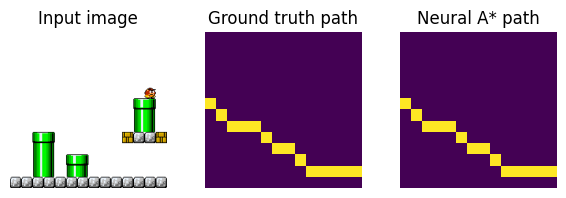

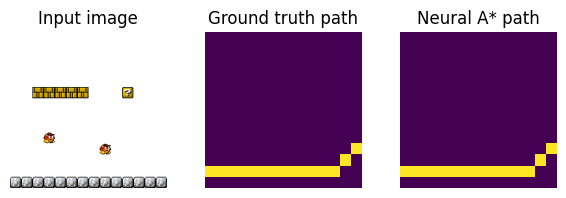

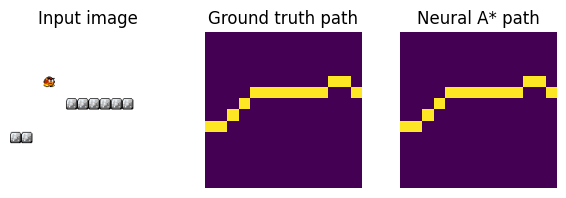

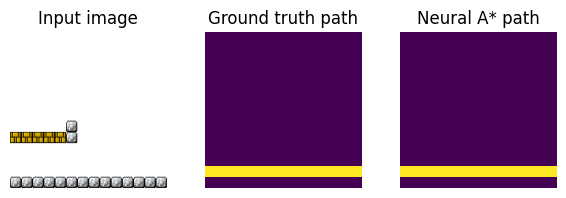

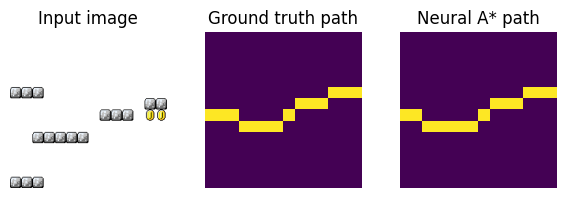

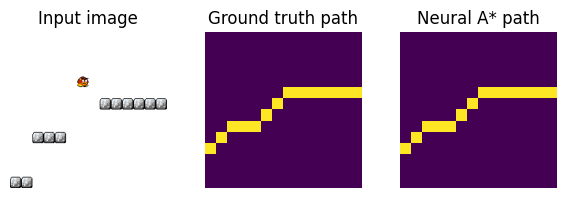

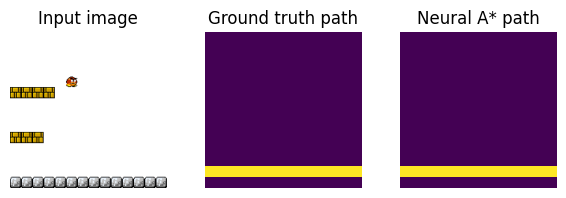

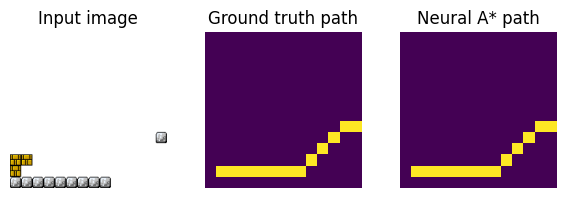

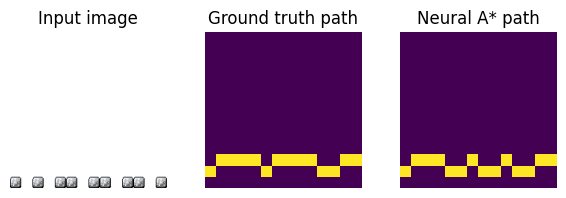

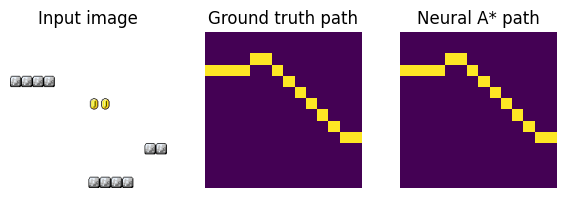

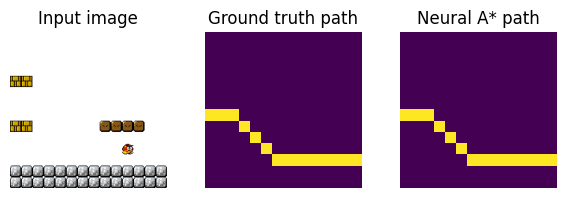

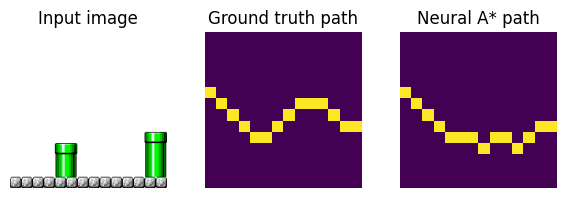

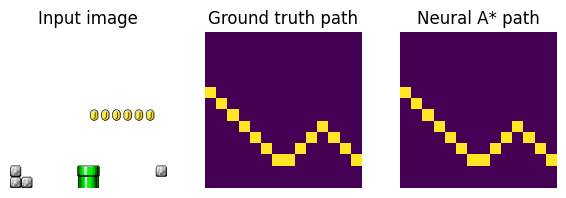

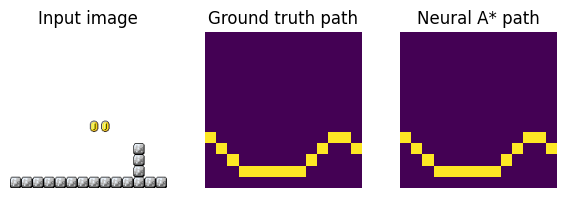

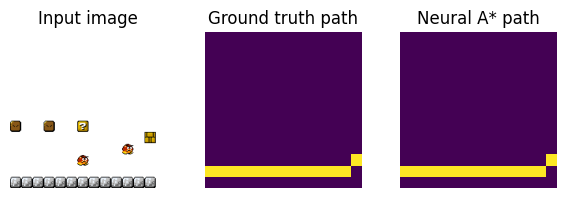

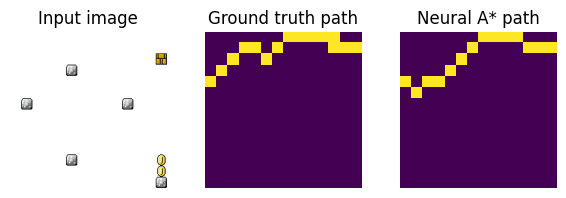

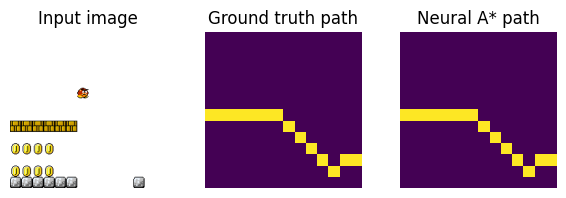

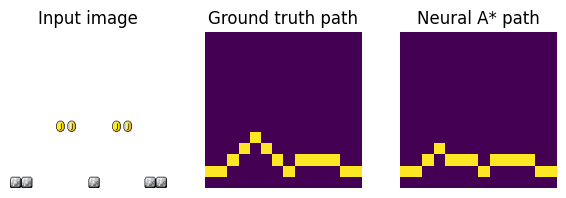

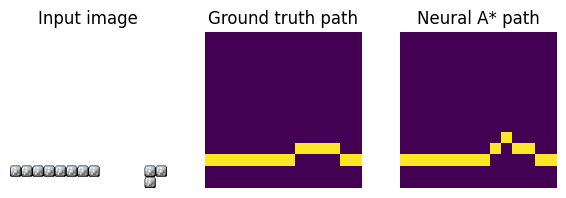

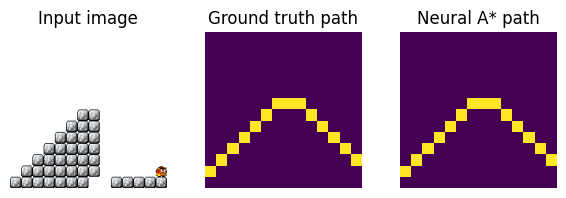

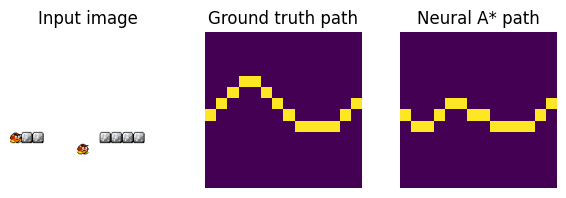

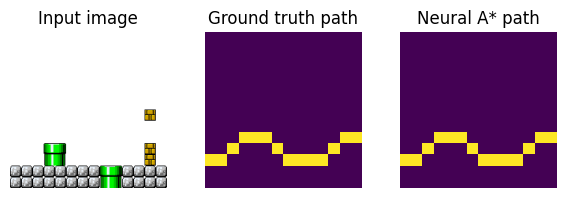

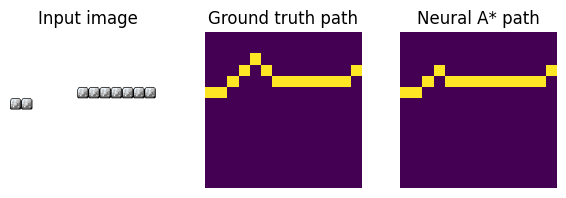

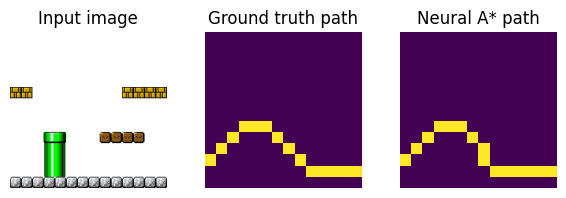

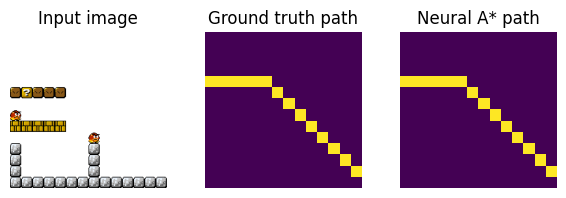

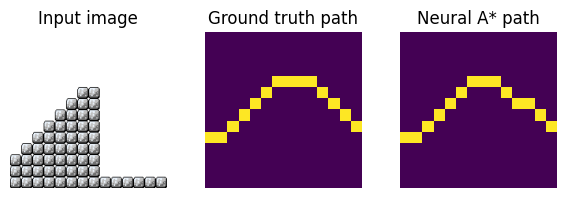

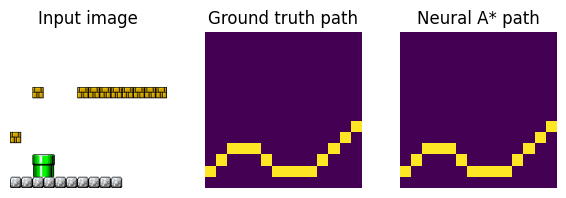

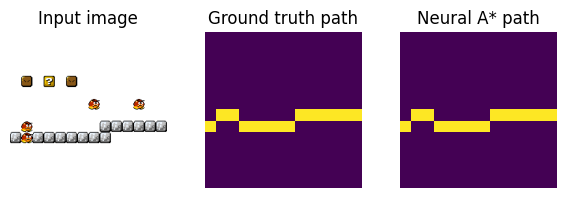

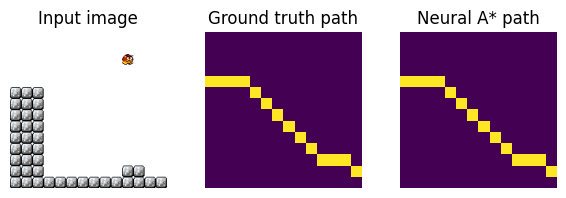

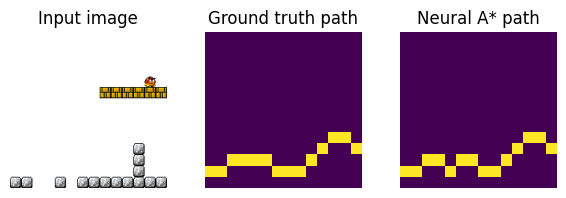

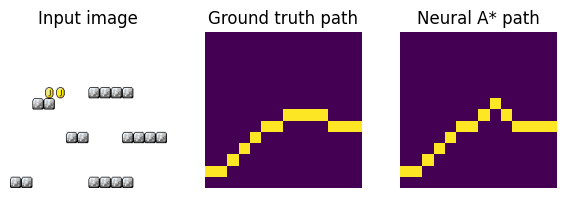

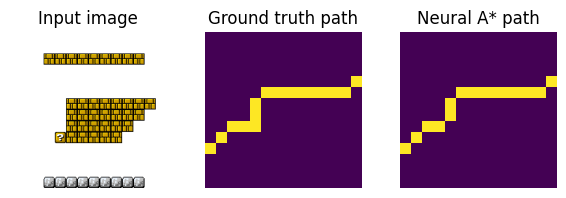

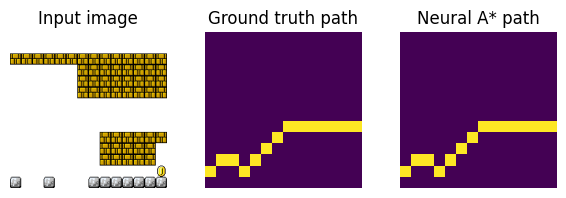

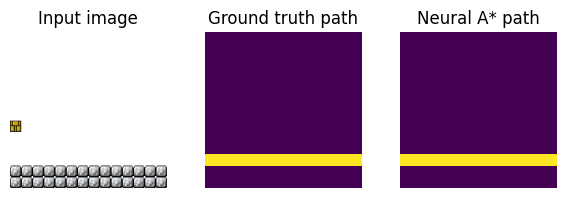

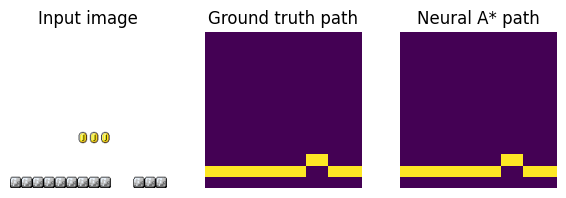

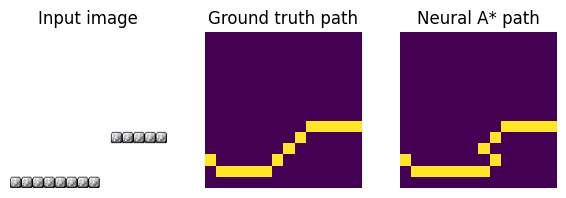

In [4]:
outputs = model(map_designs, start_maps, goal_maps)

for t in range(100):
    fig, axes = plt.subplots(1, 3, figsize=[6, 2])
    axes[0].imshow(map_designs[t].permute(1, 2, 0))
    axes[0].axis("off")
    axes[1].imshow(opt_trajs[t, 0])
    axes[0].set_title("Input image")
    axes[1].axis("off")
    axes[1].set_title("Ground truth path")
    axes[2].imshow(outputs.paths[t, 0])
    axes[2].axis("off")
    axes[2].set_title("Neural A* path")
    fig.tight_layout()
    plt.savefig(f"assets/mario{t}.png")